In [1]:
# !pip install pyLDAvis
# !pip install apyori

In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import LatentDirichletAllocation
import nltk
from konlpy.tag import Okt
import re
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
# 데이터 불러오기
data_2016 = pd.read_csv('jeju_small_company.csv',index_col=0)
data_2017 = pd.read_csv('jeju_small_company2.csv',index_col=0)
data_2018 = pd.read_csv('jeju_small_company3.csv',index_col=0)
data_2019 = pd.read_csv('jeju_small_company4.csv',index_col=0)
data_2020 = pd.read_csv('jeju_small_company_2020.csv',index_col=0)

In [4]:
# 기사 내용없는 데이터 제거
data_2016 = data_2016.dropna(axis=0)
data_2017 = data_2017.dropna(axis=0)
data_2018 = data_2018.dropna(axis=0)
data_2019 = data_2019.dropna(axis=0)
data_2020 = data_2020.dropna(axis=0)

# 방법 1 sklearn LDA 이용

In [5]:
# 명사 추출
def tokenizer(text) :
    okt = Okt()
    text_nouns = okt.nouns(text)
    norm = [word for word in text_nouns if len(word) > 1]
    return norm

In [6]:
# 토픽모델링 모델 생성
vectorizer = TfidfVectorizer(tokenizer=tokenizer)
topic_2016 = vectorizer.fit_transform(data_2016['text'])
lda_model=LatentDirichletAllocation(n_components=10,learning_method='online',random_state=777,max_iter=1)
lda_top=lda_model.fit_transform(topic_2016)
terms = vectorizer.get_feature_names() # 단어 집합. 1,000개의 단어가 저장됨.

In [7]:
# 토픽 추출
def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(2)) for i in topic.argsort()[:-n - 1:-1]])
get_topics(lda_model.components_,terms)

Topic 1: [('홈쇼핑', 0.92), ('큐텐', 0.86), ('노선', 0.83), ('개최', 0.79), ('롯데', 0.78)]
Topic 2: [('레비', 0.92), ('레스코', 0.83), ('충전', 0.81), ('홈쇼핑', 0.79), ('의원', 0.73)]
Topic 3: [('롯데', 1.2), ('홈쇼핑', 1.18), ('오전', 1.15), ('불화수소', 0.99), ('장관', 0.98)]
Topic 4: [('아시아나', 0.88), ('이광수', 0.81), ('기업', 0.77), ('기술', 0.76), ('미술', 0.76)]
Topic 5: [('홈쇼핑', 1.77), ('롯데', 1.61), ('현지', 1.33), ('국내', 1.2), ('에너지', 1.13)]
Topic 6: [('본부', 1.01), ('제품', 0.93), ('선관위', 0.88), ('홍보', 0.86), ('기업', 0.84)]
Topic 7: [('기업', 1.82), ('중소기업', 1.54), ('에너지', 1.51), ('선관위', 1.49), ('스타', 1.44)]
Topic 8: [('사업', 10.03), ('기업', 8.92), ('지역', 7.79), ('회장', 7.36), ('경제', 6.81)]
Topic 9: [('일보', 4.75), ('신문', 2.21), ('매일', 1.98), ('일본', 1.48), ('스마트', 1.48)]
Topic 10: [('아세안', 1.06), ('선관위', 0.87), ('한인', 0.83), ('법안', 0.81), ('베트남', 0.79)]


In [8]:
# 토픽 모델링 시각화 json graph
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_model, topic_2016, vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.013426  0.000025       1        1  90.937533
8     -0.000501 -0.001591       2        1   2.139241
6     -0.000665  0.001150       3        1   0.907383
4      0.001274  0.000404       4        1   0.859416
2      0.001395  0.000156       5        1   0.859410
5      0.001916  0.000065       6        1   0.859407
0      0.002360  0.000067       7        1   0.859404
9      0.002388 -0.000072       8        1   0.859403
3      0.002587 -0.000150       9        1   0.859402
1      0.002672 -0.000054      10        1   0.859401, topic_info=       Term      Freq     Total Category  logprob  loglift
1998     기업  3.000000  3.000000  Default  30.0000  30.0000
13286  중소기업  3.000000  3.000000  Default  29.0000  29.0000
13472    지원  2.000000  2.000000  Default  28.0000  28.0000
8067     수출  2.000000  2.000000  Default  27.0000  27.0000
16727    회장  3.000000  3.000000  Default  26.0000  26.0000
...     ...       ...       ...      ...      ...      ...
9620   연합뉴스  0.003492  0.858566  Topic10  -9.4480  -0.7482
7472     설명  0.003478  1.163372  Topic10  -9.4519  -1.0559
1998     기업  0.003455  3.972231  Topic10  -9.4584  -2.2905
7036     상담  0.003443  1.359312  Topic10  -9.4622  -1.2218
12090    재산  0.003437  0.546917  Topic10  -9.4637  -0.3129

[722 rows x 6 columns], token_table=       Topic      Freq Term
term                       
310        1  1.191458   강연
316        1  1.532468  강원도
430        1  1.254961   개최
530        1  0.654291   검사
651        1  0.968133   경기
...      ...       ...  ...
16462      1  1.504635   홍보
16562      1  0.879184  화장품
16583      1  0.766839   확대
16727      1  0.915859   회장
16751      1  1.767049   효율

[112 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 9, 7, 5, 3, 6, 1, 10, 4, 2])

# 방법2 gensim 이용

In [9]:
# 텍스트 전처리
lst_2016 = []
for text in data_2016['text']:
    okt = Okt()
    text_nouns = okt.nouns(text)
    nouns_2 = [word for word in text_nouns if len(word) > 1]
    lst_2016.append(nouns_2)

In [10]:
# 토픽모델링 모델 생성
import gensim

dictionary = gensim.corpora.Dictionary(lst_2016)
corpus = [dictionary.doc2bow(text) for text in lst_2016]

C:\ProgramData\Anaconda3\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [11]:
# 토픽 추출
import gensim
NUM_TOPICS = 10 
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15,minimum_probability=0)
topics = ldamodel.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.028*"사업" + 0.015*"산업" + 0.015*"지역" + 0.009*"추진" + 0.008*"화장품"')
(1, '0.045*"검사" + 0.019*"과장" + 0.014*"선관위" + 0.013*"본부" + 0.010*"지역"')
(2, '0.009*"스마트" + 0.009*"투자" + 0.008*"시티" + 0.007*"기업" + 0.006*"한국"')
(3, '0.013*"오전" + 0.013*"기업" + 0.009*"지원" + 0.009*"오후" + 0.008*"수출"')
(4, '0.008*"수출" + 0.007*"한국" + 0.006*"경제" + 0.006*"발전" + 0.006*"기업"')
(5, '0.018*"일본" + 0.008*"서울" + 0.008*"과장" + 0.007*"맥주" + 0.007*"센터"')
(6, '0.021*"일본" + 0.012*"장관" + 0.012*"회장" + 0.011*"규제" + 0.010*"대기업"')
(7, '0.021*"기업" + 0.018*"지원" + 0.011*"중소기업" + 0.011*"기술" + 0.010*"지역"')
(8, '0.020*"일보" + 0.018*"제주" + 0.017*"수출" + 0.008*"대표" + 0.007*"경제"')
(9, '0.011*"기업" + 0.011*"경제" + 0.009*"회장" + 0.009*"중소기업" + 0.007*"정부"')


In [12]:
# 시각화
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary=ldamodel.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.096917  0.074583       1        1  16.254419
3     -0.034223 -0.105854       2        1  12.737341
0     -0.021509 -0.142175       3        1  12.498089
6     -0.134560  0.147191       4        1  11.319825
7     -0.040206 -0.081718       5        1   9.584226
4     -0.051050  0.027215       6        1   8.731663
8     -0.021542 -0.036225       7        1   8.002244
5      0.090897  0.122130       8        1   7.730879
1      0.332722  0.018114       9        1   7.649127
2     -0.023610 -0.023262      10        1   5.492191, topic_info=     Term         Freq        Total Category  logprob  loglift
680    검사   824.000000   824.000000  Default  30.0000  30.0000
2662   일본  1036.000000  1036.000000  Default  29.0000  29.0000
47     과장   494.000000   494.000000  Default  28.0000  28.0000
460    일보   456.000000   456.000000  Default  27.0000  27.0000
278    사업  1603.000000  1603.000000  Default  26.0000  26.0000
...   ...          ...          ...      ...      ...      ...
1241   위해    39.741722   701.313965  Topic10  -5.7640   0.0313
1779   올해    37.117085   465.854828  Topic10  -5.8323   0.3720
3405   규모    35.437416   388.105621  Topic10  -5.8786   0.5083
95     기술    37.563156   881.373169  Topic10  -5.8203  -0.2536
1565   해외    32.177959   526.998779  Topic10  -5.9751   0.1059

[790 rows x 6 columns], token_table=       Topic      Freq  Term
term                        
12656      3  0.957886  가드레일
12702      1  0.060438    가방
12702      6  0.060438    가방
12702     10  0.846128    가방
7980       2  0.063889    가죽
...      ...       ...   ...
2803       4  0.014053    후보
2803       5  0.070267    후보
2803       6  0.028107    후보
2803       7  0.014053    후보
2803       9  0.084321    후보

[2611 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 4, 1, 7, 8, 5, 9, 6, 2, 3])

# 의미 연결망 분석(단어 네트워크)

In [13]:
# 토픽별 상위 단어 30개 추출
top_30 = ldamodel.show_topics(num_topics=10, num_words=30, log=False, formatted=True)

In [14]:
# 단어를 리스트 형식으로 변환
t2l = []
for text in top_30:
    words = list(text)
    t2l.append(words)

In [15]:
# 단어들만 따로 추출
word = []
for text in t2l:
    regex = re.compile('[가-힣]+').findall(str(text))
    word.append(regex)

In [16]:
from apyori import apriori

In [17]:
# 연관분석
result = (list(apriori(word,min_support=0.4)))
df = pd.DataFrame(result)
# 지지도를 낮게하면 연산이 오래걸림

In [18]:
df['length'] = df['items'].apply(lambda x: len(x))

In [19]:
df=df[(df['length']==2)].sort_values(by='support',ascending=False)

In [20]:
# 연관분석 결과
df

,items,support,ordered_statistics,length
48,"(한국, 기업)",0.7,"[((), (한국, 기업), 0.7, 1.0), ((기업), (한국), 0.7777...",2
37,"(기업, 산업)",0.7,"[((), (기업, 산업), 0.7, 1.0), ((기업), (산업), 0.7777...",2
52,"(사업, 산업)",0.6,"[((), (사업, 산업), 0.6, 1.0), ((사업), (산업), 0.8571...",2
36,"(기업, 사업)",0.6,"[((), (기업, 사업), 0.6, 1.0), ((기업), (사업), 0.6666...",2
44,"(중소기업, 기업)",0.6,"[((), (중소기업, 기업), 0.6, 1.0), ((기업), (중소기업), 0....",2
...,...,...,...,...
55,"(시장, 사업)",0.4,"[((), (시장, 사업), 0.4, 1.0), ((사업), (시장), 0.5714...",2
56,"(정책, 사업)",0.4,"[((), (정책, 사업), 0.4, 1.0), ((사업), (정책), 0.5714...",2
57,"(중소기업, 사업)",0.4,"[((), (중소기업, 사업), 0.4, 1.0), ((사업), (중소기업), 0....",2
60,"(한국, 사업)",0.4,"[((), (한국, 사업), 0.4, 1.0), ((사업), (한국), 0.5714...",2


In [21]:
import networkx as nx
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['text']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [22]:
# 네트워크 생성
G = nx.Graph()
ar = (df['items'])
G.add_edges_from(ar)

In [23]:
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000*(nsize - min(nsize))/(max(nsize)-min(nsize))

In [24]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:\Windows\Fonts/H2GTRE.ttf").get_name()
rc('font', family=font_name)

<>:2: DeprecationWarning: invalid escape sequence \W
<>:2: DeprecationWarning: invalid escape sequence \W
<>:2: DeprecationWarning: invalid escape sequence \W
<ipython-input-24-aba868ac5698>:2: DeprecationWarning: invalid escape sequence \W
  font_name = font_manager.FontProperties(fname="C:\Windows\Fonts/H2GTRE.ttf").get_name()


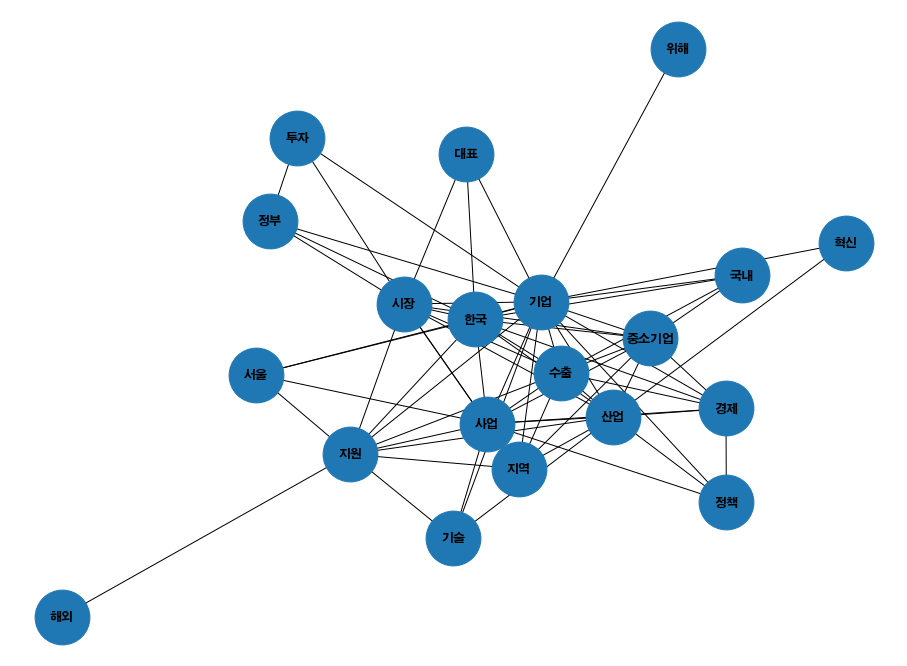

In [25]:
# 시각화
plt.figure(figsize(16,12))
plt.axis('off')
nx.draw_networkx(G,font_family=font_name,node_size=3000)

# t-sne분석

In [26]:
# 모델 생성
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

In [27]:
# 시각화
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
import matplotlib.colors as mcolors

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 4
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 487 samples in 0.002s...
[t-SNE] Computed neighbors for 487 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 487 / 487
[t-SNE] Mean sigma: 0.031988
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.927166
[t-SNE] KL divergence after 1000 iterations: 0.266469


Loading BokehJS ...

# 년도별

In [28]:
vectorizer = TfidfVectorizer(tokenizer=tokenizer)
topic_2017 = vectorizer.fit_transform(data_2017['text'])
lda_model=LatentDirichletAllocation(n_components=10,learning_method='online',random_state=777,max_iter=1)
lda_top=lda_model.fit_transform(topic_2017)
terms = vectorizer.get_feature_names() # 단어 집합. 1,000개의 단어가 저장됨.

def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(2)) for i in topic.argsort()[:-n - 1:-1]])
get_topics(lda_model.components_,terms)

Topic 1: [('예술', 0.8), ('김치', 0.79), ('선관위', 0.75), ('물류', 0.74), ('판매', 0.71)]
Topic 2: [('규제', 19.01), ('기업', 18.74), ('특구', 17.56), ('지역', 17.15), ('사업', 14.91)]
Topic 3: [('지점', 1.33), ('부장', 1.03), ('센터', 0.89), ('실장', 0.83), ('본부장', 0.81)]
Topic 4: [('캠코', 0.81), ('롯데', 0.79), ('홈쇼핑', 0.7), ('상무', 0.7), ('국장', 0.66)]
Topic 5: [('세법', 0.88), ('소득', 0.8), ('김치', 0.72), ('자회사', 0.68), ('금액', 0.65)]
Topic 6: [('롯데', 4.38), ('홈쇼핑', 4.08), ('수출', 2.75), ('미국', 2.55), ('현지', 2.42)]
Topic 7: [('이스타항공', 2.23), ('출마', 1.51), ('불출', 1.5), ('의원', 1.41), ('제주항공', 1.3)]
Topic 8: [('롯데', 1.13), ('상무', 1.08), ('전무', 0.86), ('승진', 0.86), ('트럭', 0.69)]
Topic 9: [('창업', 1.34), ('블록', 1.28), ('상무', 1.23), ('본부', 1.21), ('체인', 1.18)]
Topic 10: [('검찰', 0.9), ('법무', 0.8), ('국민', 0.75), ('범죄', 0.68), ('위해', 0.66)]


In [29]:
vectorizer = TfidfVectorizer(tokenizer=tokenizer)
topic_2018 = vectorizer.fit_transform(data_2018['text'])
lda_model=LatentDirichletAllocation(n_components=10,learning_method='online',random_state=777,max_iter=1)
lda_top=lda_model.fit_transform(topic_2018)
terms = vectorizer.get_feature_names() # 단어 집합. 1,000개의 단어가 저장됨.

def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(2)) for i in topic.argsort()[:-n - 1:-1]])
get_topics(lda_model.components_,terms)

Topic 1: [('뉴시스', 0.6), ('사외이사', 0.55), ('부장', 0.54), ('본부장', 0.5), ('사업', 0.49)]
Topic 2: [('지방검찰청', 1.37), ('선임', 1.26), ('사외이사', 1.06), ('최석', 0.92), ('증권', 0.8)]
Topic 3: [('대출', 0.46), ('금리', 0.36), ('가계', 0.34), ('사내', 0.33), ('주택', 0.3)]
Topic 4: [('매화', 2.9), ('스마트', 2.14), ('공장', 1.97), ('전기차', 1.74), ('기업', 1.63)]
Topic 5: [('재산', 0.72), ('사면', 0.65), ('본부장', 0.55), ('신고', 0.51), ('부장', 0.47)]
Topic 6: [('장려', 0.49), ('기업', 0.47), ('혁신', 0.46), ('사업', 0.46), ('우산', 0.41)]
Topic 7: [('미세먼지', 0.41), ('본부장', 0.41), ('부장', 0.41), ('룩셈부르크', 0.37), ('지역', 0.3)]
Topic 8: [('블록', 2.18), ('체인', 2.09), ('특구', 1.32), ('규제', 1.15), ('기업', 0.86)]
Topic 9: [('기업', 90.06), ('지역', 84.75), ('규제', 84.52), ('사업', 69.78), ('지원', 66.89)]
Topic 10: [('금고', 1.12), ('은행', 0.82), ('지방', 0.66), ('스마트', 0.65), ('규제', 0.47)]


In [43]:
vectorizer = TfidfVectorizer(tokenizer=tokenizer)
topic_2019 = vectorizer.fit_transform(data_2019['text'])
lda_model=LatentDirichletAllocation(n_components=10,learning_method='online',random_state=777,max_iter=1)
lda_top=lda_model.fit_transform(topic_2019)
terms = vectorizer.get_feature_names() # 단어 집합. 1,000개의 단어가 저장됨.

def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(2)) for i in topic.argsort()[:-n - 1:-1]])
get_topics(lda_model.components_,terms)

Topic 1: [('뉴시스', 0.6), ('사외이사', 0.55), ('부장', 0.54), ('본부장', 0.5), ('사업', 0.49)]
Topic 2: [('지방검찰청', 1.37), ('선임', 1.26), ('사외이사', 1.06), ('최석', 0.92), ('증권', 0.8)]
Topic 3: [('대출', 0.46), ('금리', 0.36), ('가계', 0.34), ('사내', 0.33), ('주택', 0.3)]
Topic 4: [('스마트', 2.14), ('공장', 1.95), ('전기차', 1.74), ('기업', 1.62), ('구축', 1.56)]
Topic 5: [('재산', 0.72), ('사면', 0.65), ('본부장', 0.55), ('신고', 0.51), ('부장', 0.47)]
Topic 6: [('장려', 0.49), ('기업', 0.47), ('혁신', 0.47), ('사업', 0.46), ('우산', 0.41)]
Topic 7: [('미세먼지', 0.41), ('본부장', 0.41), ('부장', 0.41), ('룩셈부르크', 0.37), ('지역', 0.3)]
Topic 8: [('블록', 2.18), ('체인', 2.09), ('특구', 1.32), ('규제', 1.15), ('기업', 0.86)]
Topic 9: [('기업', 89.97), ('지역', 85.04), ('규제', 84.67), ('사업', 69.7), ('지원', 67.05)]
Topic 10: [('금고', 1.12), ('은행', 0.82), ('스마트', 0.67), ('지방', 0.66), ('공장', 0.49)]


In [31]:
vectorizer = TfidfVectorizer(tokenizer=tokenizer)
topic_2020 = vectorizer.fit_transform(data_2020['text'])
lda_model=LatentDirichletAllocation(n_components=10,learning_method='online',random_state=777,max_iter=1)
lda_top=lda_model.fit_transform(topic_2020)
terms = vectorizer.get_feature_names() # 단어 집합. 1,000개의 단어가 저장됨.

def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(2)) for i in topic.argsort()[:-n - 1:-1]])
get_topics(lda_model.components_,terms)

Topic 1: [('판매', 1.37), ('번가', 1.22), ('상품', 1.09), ('풍력', 1.06), ('해상', 0.97)]
Topic 2: [('이스타항공', 0.96), ('풍력', 0.86), ('해상', 0.8), ('뉴딜', 0.68), ('맥주', 0.65)]
Topic 3: [('프러포즈', 1.43), ('풍력', 1.09), ('쇼핑', 1.06), ('해상', 1.01), ('개국', 0.94)]
Topic 4: [('풍력', 1.34), ('맥주', 1.34), ('해상', 1.26), ('창업', 1.16), ('충전', 1.14)]
Topic 5: [('매출', 1.13), ('충전', 0.85), ('감소', 0.79), ('뉴시스', 0.77), ('포인트', 0.77)]
Topic 6: [('충전', 1.25), ('전기차', 1.15), ('이동형', 1.01), ('맥주', 0.98), ('유니콘', 0.81)]
Topic 7: [('풍력', 2.03), ('해상', 1.9), ('두산', 1.31), ('중공업', 1.27), ('발전기', 0.8)]
Topic 8: [('매출', 28.23), ('코로나', 27.36), ('지원', 22.8), ('감소', 20.06), ('지역', 19.24)]
Topic 9: [('일보', 1.02), ('맥주', 0.87), ('매출', 0.83), ('해상', 0.82), ('풍력', 0.76)]
Topic 10: [('풍력', 1.31), ('해상', 1.26), ('맥주', 1.06), ('두산', 0.96), ('과장', 0.87)]
